In [91]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams

In [92]:
filename='scores.csv'

#Read csv
df = pd.read_csv(filename)
df.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [93]:
df = df[pd.notnull(df["Average Score (SAT Math)"])]
df = df.reset_index(drop=True)
df.head(5)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
1,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
2,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
3,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
4,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [94]:
# Rename the column 'Average Score (SAT Math)' to 'SATMath'
df.rename(columns={'Average Score (SAT Math)': 'SATMath'}, inplace=True)

# Display the first few rows to verify the column renaming
print("Updated columns:", df.columns)

# Save the updated DataFrame back to a CSV file
df.to_csv('onlinefoods_updated.csv', index=False)

Updated columns: Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'SATMath', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)',
       'Percent Tested'],
      dtype='object')


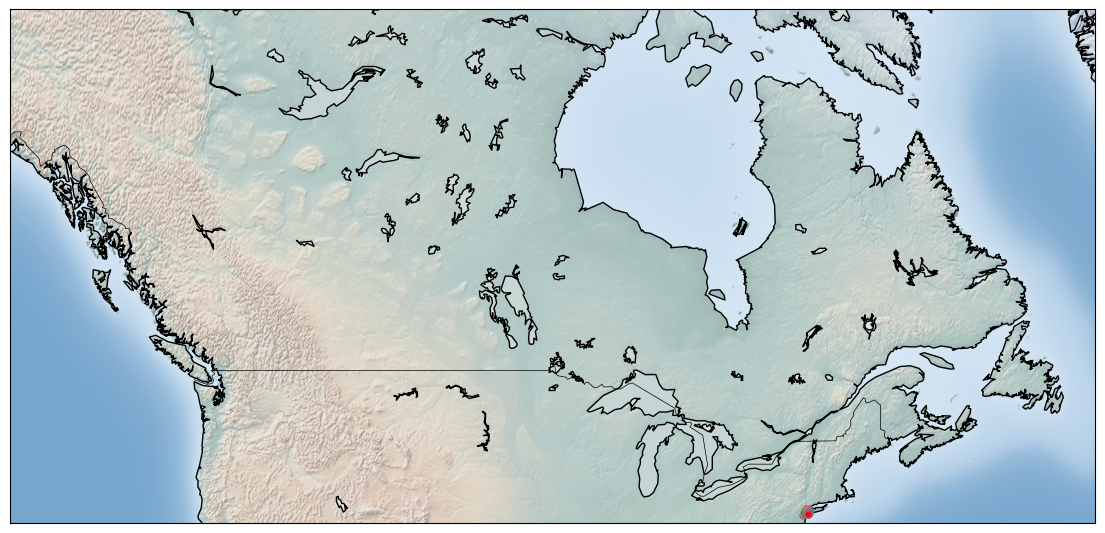

In [95]:
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

df = df[(df['Longitude'] > llon) & (df['Longitude'] < ulon) & (df['Latitude'] > llat) &(df['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
       
xs, ys = my_map(np.asarray(df.Longitude), np.asarray(df.Latitude))
df['xm'] = xs.tolist()
df['ym'] = ys.tolist()

for index, row in df.iterrows():
    my_map.plot(row['xm'], row['ym'], markerfacecolor=([1, 0, 0]), marker='o', markersize=5, alpha=0.75)
plt.show()

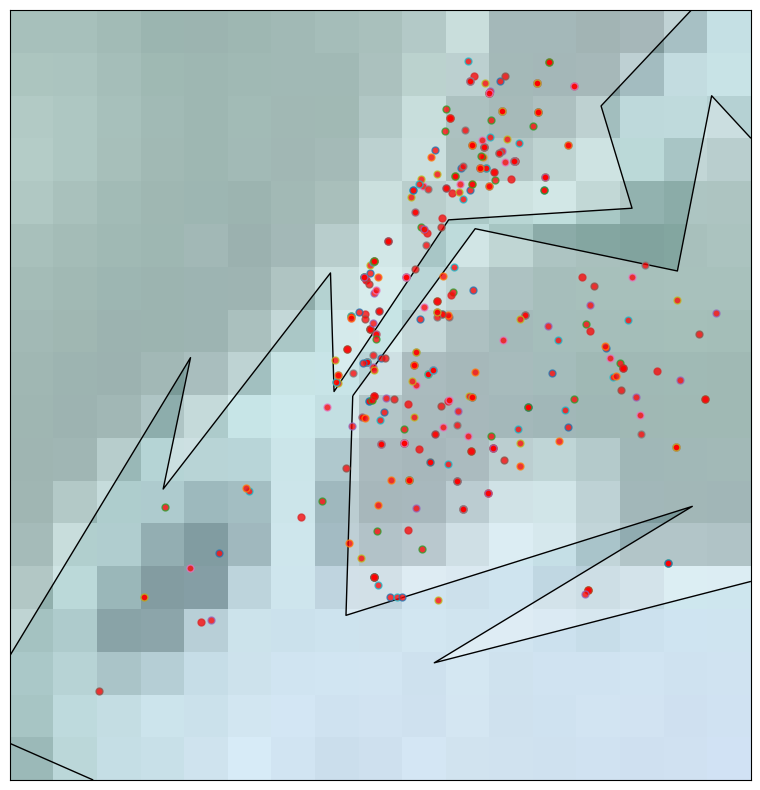

In [96]:
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon = -74.2591  
ulon = -73.7004  
llat = 40.4774  
ulat = 40.9176

df = df[(df['Longitude'] > llon) & (df['Longitude'] < ulon) & (df['Latitude'] > llat) &(df['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
       
xs, ys = my_map(np.asarray(df.Longitude), np.asarray(df.Latitude))
df['xm'] = xs.tolist()
df['ym'] = ys.tolist()

for index, row in df.iterrows():
    my_map.plot(row['xm'], row['ym'], markerfacecolor=([1, 0, 0]), marker='o', markersize=5, alpha=0.75)
plt.show()

In [100]:
# Replace ?
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

# Set the random state for reproducibility
sklearn.utils.check_random_state(1000)

# Prepare the dataset
Clus_dataSet = df[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

# A sample of clusters
df[["School Name", "Student Enrollment", "SATMath", "Clus_Db"]].head(5)


,School Name,Student Enrollment,SATMath,Clus_Db
0,"New Explorations into Science, Technology and ...",1735.0,657.0,0
1,Essex Street Academy,358.0,395.0,0
2,Lower Manhattan Arts Academy,383.0,418.0,0
3,High School for Dual Language and Asian Studies,416.0,613.0,0
4,Henry Street School for International Studies,255.0,410.0,0


In [98]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

Cluster 0, Average Score (SAT Math): 468.46666666666664
Cluster 1, Average Score (SAT Math): 459.2857142857143
Cluster 2, Average Score (SAT Math): 450.57894736842104
Cluster 3, Average Score (SAT Math): 392.66
Cluster 4, Average Score (SAT Math): 489.5
Cluster 5, Average Score (SAT Math): 416.9


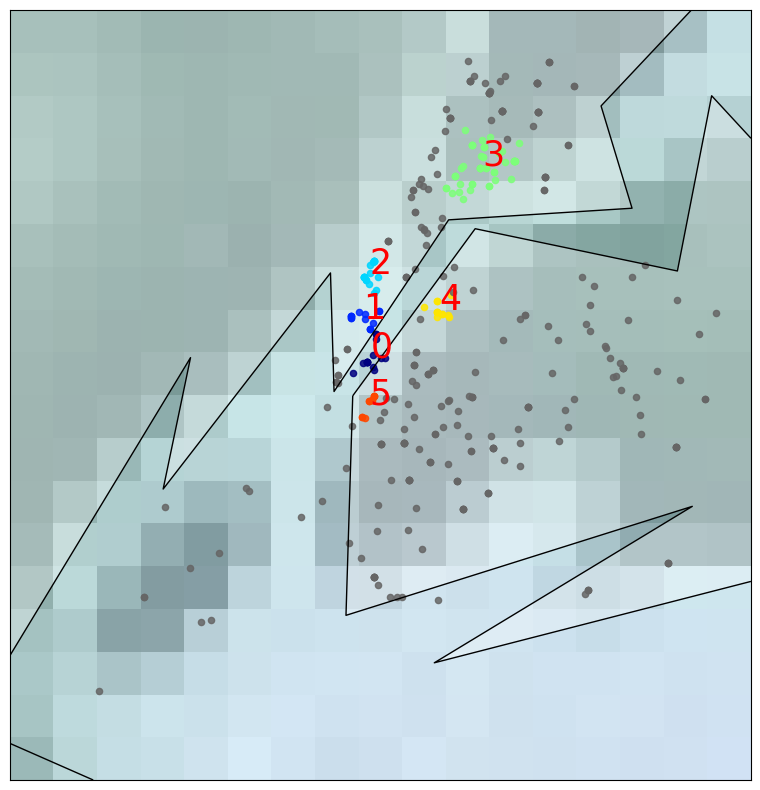

In [101]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, 
            urcrnrlon=ulon, urcrnrlat=ulat) 

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]                
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Average Score (SAT Math): '+ str(np.mean(clust_set.SATMath)))